In [1]:
%load_ext autoreload
%autoreload 2

# Visualize metadata

This notebook shows a few examples of how to use the `poligrain` functions to visualize CML meta data. 

*To add: plotting SML & PWS meta data*

All the functions rely on the [OpenSense](https://github.com/OpenSenseAction/OS_data_format_conventions) naming convention so that we can easily pass an `xarray.Dataset` or `DataArray` to the functions.

In [3]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

import poligrain as plg

## Plotting length vs. frequency

Plot the distribution of frequency against the corresponding length for the entire CML dataset. 

In [4]:
# Load example dataset
ds_cmls = xr.open_dataset("../../tests/test_data/openMRG_CML_180minutes.nc")

Text(0.5, 1.0, 'Link length vs. frequency of the OpenMRG-CML dataset')

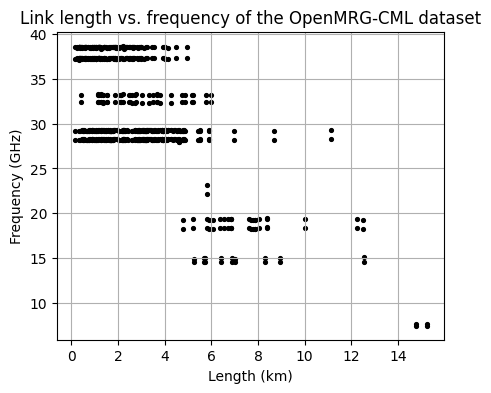

In [3]:
fig, ax = plt.subplots(figsize=(5, 4))
scatter = plg.plot_metadata.plot_len_vs_freq(
    ds_cmls.length, ds_cmls.frequency, marker_size=30, grid=True, ax=ax
)

# optionally customize output plot
ax.set_title("Link length vs. frequency of the OpenMRG-CML dataset")

### Frequency vs. length hexbin
Alternatively, plot the same as above but as a scatter density plot

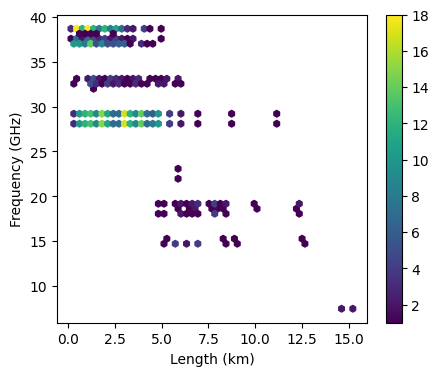

In [9]:
fig, ax = plt.subplots(figsize=(5, 4))
hexbin = plg.plot_metadata.plot_len_vs_freq_hexbin(
    ds_cmls.length, ds_cmls.frequency, gridsize=50, ax=ax
)

plt.colorbar(hexbin, label="density")

### Frequency vs. length with margin plots

We can also visualize the density of the path length vs. frequency scatter plot by adding histograms of the distribution of frequency and length in the margins. <br>
*This is pretty much like Seaborn's jointplot, but relies only on Matplotlib.*

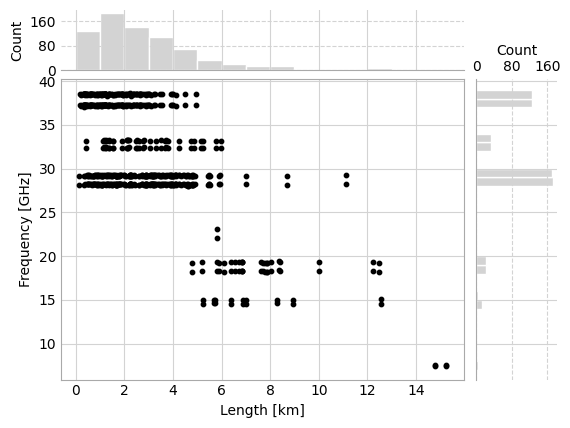

In [8]:
fig, axes = plt.subplots(
    2,
    2,
    gridspec_kw={
        "hspace": 0.05,
        "wspace": 0.05,
        "width_ratios": [5, 1],
        "height_ratios": [1, 5],
    },
)
_ = plg.plot_metadata.plot_len_vs_freq_jointplot(ds_cmls.length, ds_cmls.frequency, axes=axes)

### Plotting distributions of frequency, length, and polarization. 

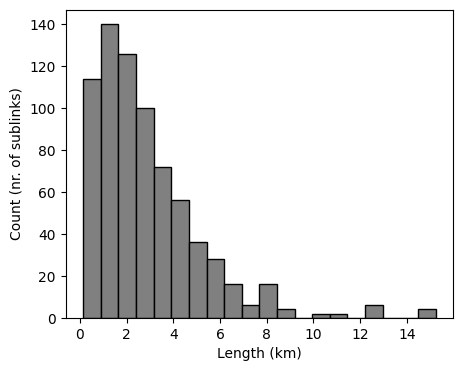

In [10]:
fig, ax = plt.subplots(figsize=(5, 4))
len_bars = plg.plot_metadata.plot_distribution(
    length=ds_cmls.length, frequency=ds_cmls.frequency, variable="length", ax=ax
)

We can also plot the distribution as a percentage. 

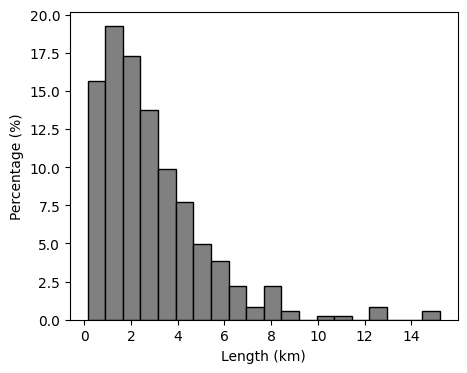

In [11]:
fig, ax = plt.subplots(figsize=(5, 4))
len_bars = plg.plot_metadata.plot_distribution(
    length=ds_cmls.length,
    frequency=ds_cmls.frequency,
    variable="length",
    percentage=True,
    ax=ax,
)

And customize the plot a bit using keyword arguments. 

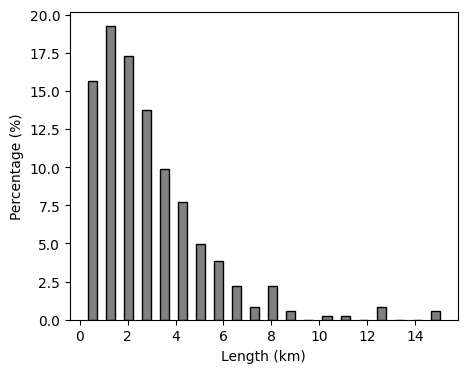

In [13]:
fig, ax = plt.subplots(figsize=(5, 4))
len_bars = plg.plot_metadata.plot_distribution(
    length=ds_cmls.length,
    frequency=ds_cmls.frequency,
    variable="length",
    percentage=True,
    ax=ax,
    rwidth=0.5,
)

We can also plot the polarization of CMLs.<br> 
In this dataset all CMLs have two sub-links, both with the same polarization, of which the vast majority is vertically polarized.  

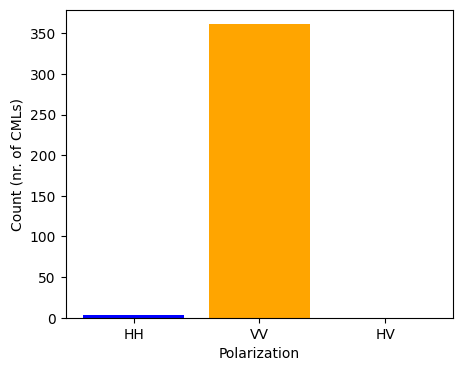

In [15]:
fig, ax = plt.subplots(figsize=(5, 4))
pol_bar = plg.plot_metadata.plot_polarization(
    ds_cmls.polarization, colors=["blue", "orange", "green"], ax=ax
)

### [WIP] Plot availability during data period

Text(0.05, 0.95, 'Mean = 98.90%')

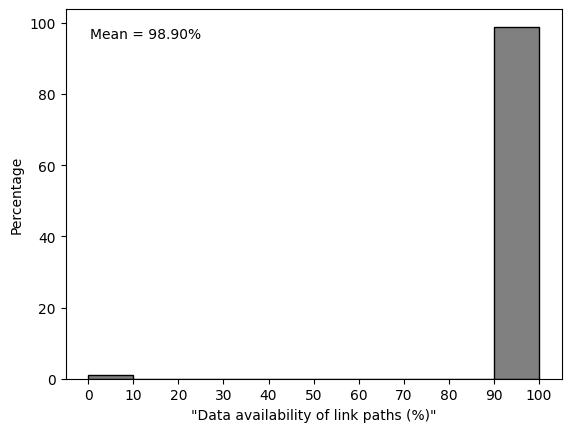

In [ ]:
ds_cml_paths = ds_cmls.mean(dim='sublink_id')
fig, ax = plt.subplots()
plg.plot_metadata.plot_data_availability_distribution(ds_cml_paths, ax=ax)

ax.set_xlabel('"Data availability of link paths (%)"')

availability = (ds_cml_paths['rsl'].count(dim='time') / ds_cml_paths.sizes['time']) * 100
mean_availability = np.nanmean(availability.values)
ax.annotate(
    f"Mean = {mean_availability:.2f}%",
    xy=(0.05, 0.95),        # relative coordinates
    xycoords='axes fraction',  # relative to axes
    ha='left', 
    va='top',
)

In [ ]:
# Plot time series availability - daily (choose daily interval to reduce computational time)

In [ ]:
# Plot time series availability - subdaily